Make sure you fill in any place that says `YOUR CODE HERE` or `YOUR ANSWER HERE`, as well as your name below:

In [7]:
NAME = "Yin Qiu"

---

# Lab 2: Clustering ##

**Please read the following instructions very carefully**

## About the Dataset
The dataset for this lab has been created from some custom features from Lab 1. The columns are named as q1, q2....etc. A description of the features can be found at this link: https://docs.google.com/spreadsheets/d/18wwyjGku2HYfgDX9Vez64lGHz31E_PfbpmAdfb7ly6M/edit?usp=sharing

## Working on the assignment / FAQs
- **Always use the seed/random_state as *42* wherever applicable** (This is to ensure repeatability in answers, across students and coding environments) 
- Questions can be either autograded and manually graded.
- The type of question and the points they carry are indicated in each question cell
- An autograded question has 3 cells
     - **Question cell** : Read only cell containing the question
     - **Code Cell** : This is where you write the code
     - **Grading cell** : This is where the grading occurs, and **you are required not to edit this cell**
- Manually graded questions only have the question and code cells.
- To avoid any ambiguity, each question also specifies what *value* the function must return. Note that these are dummy values and not the answers
- If an autograded question has multiple answers (due to differences in handling NaNs, zeros etc.), all answers will be considered.
- Most assignments have bonus questions for extra credit, do try them out! 
- You can delete the `raise NotImplementedError()` for all manually graded questions.
- **Submitting the assignment** : Download the '.ipynb' file from Colab and upload it to canvas. Do not delete any outputs from cells before submitting.
- That's about it. Happy coding! 

In [8]:
import pandas as pd
import collections
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.preprocessing import normalize

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.style.use('ggplot')



#DOWNLOADING DATASET
!wget -nc http://people.ischool.berkeley.edu/~zp/course_datasets/yelp_reviewers.zip
!unzip -u yelp_reviewers.zip
print('Dataset Downloaded: yelp_reviewers.csv')
df = pd.read_csv('yelp_reviewers.csv')
df = df.sample(frac=0.3, random_state=42)
print(df.dropna().describe())

print('....SETUP COMPLETE....')

URL transformed to HTTPS due to an HSTS policy
File ‘yelp_reviewers.zip’ already there; not retrieving.

Archive:  yelp_reviewers.zip
Dataset Downloaded: yelp_reviewers.csv
                q3           q4  ...        q16ab        q16ac
count  7177.000000  7177.000000  ...  7177.000000  7177.000000
mean      6.838651     5.281455  ...     1.127751     3.649254
std       7.597977    16.208703  ...     4.652206     0.977100
min       1.000000     1.000000  ...     0.000000     1.000000
25%       3.000000     1.000000  ...     0.000000     3.200000
50%       5.000000     2.000000  ...     0.500000     3.777778
75%       9.000000     4.000000  ...     1.307692     4.333333
max     252.000000   607.000000  ...   342.300000     5.000000

[8 rows x 40 columns]
....SETUP COMPLETE....


In [9]:
df.head().T

,129451,116706,144394,24699,47453
user_id,kIWQXgjmVdgEs9BOgr8G5A,fXU_-5DBmNlGhI8fbX-2vQ,prF_lbKywPnZhNqvJOOaDw,8GHUeOm807bI5Qh4X3CHBA,Gd_IGX3BmRYbPD84ovLEoA
q3,1,1,1,1,8
q4,0,0,0,0,2
q5,0,0,0,0,1
q6,0,0,0,0,8
q7,0,0,0,0,2.08
q8,NaN,NaN,NaN,NaN,0.69
q9,NaN,NaN,NaN,NaN,0
q10,NaN,NaN,NaN,NaN,2.08
q11,NaN,NaN,NaN,NaN,18.18


---

### Question 1 `(1 point)`
What is the best choice of k according to the silhouette metric for clustering q4-q6? Only consider 2 <= k <= 8. 


**NOTE**: For features with high variance, empty clusters can occur. There are several ways of dealing with empty clusters. A common approach is to drop empty clusters, the prefered approach for this Lab is to treat the empty cluster as a “singleton” leaving it empty with a single point placeholder.


In [11]:
#Make sure you return the answer value in this function
#The return value must be an integer
def q1(df):
  
    X = df.loc[:, 'q4':'q6']
    X.dropna(inplace=True)
    
    sh_scores = [] # build a list of silhouette scores for k as 2 to 8
    for k in range(2, 9):
      kmeans = KMeans(n_clusters=k, random_state=42)
      kmeans.fit(X)
      score = silhouette_score(X, kmeans.labels_)
      sh_scores.append(score)
    
    max_index = sh_scores.index(max(sh_scores)) # find the first index of the largest silhouette score
    return max_index+2 # return the k value in responding to the index

    raise NotImplementedError()
print(q1(df))

2


What is the best choice of k? 

In [12]:
# The best choice of k is 2 for clustering q4-q6. When k = 2, it has the largest silhouette score.
# raise NotImplementedError()

### Question 2 `(1 point)`
What is the best choice of k according to the silhouette metric for clustering q7-q10? Only consider 2 <= k <= 8. 

In [13]:
#Make sure you return the answer value in this function
#The return value must be an integer
def q2(df):
    
    X = df.loc[:, 'q7': 'q10']
    X.dropna(inplace=True)

    sh_scores = [] # build a list of silhouette scores for k as 2 to 8
    for k in range(2, 9):
      kmeans = KMeans(n_clusters=k, random_state=42)
      kmeans.fit(X)
      score = silhouette_score(X, kmeans.labels_)
      sh_scores.append(score)
    
    max_index = sh_scores.index(max(sh_scores)) # find the first index of the largest silhouette score
    return max_index+2 # return the k value in responding to the index
    
    raise NotImplementedError()
print(q2(df))

2


What is the best choice of k? 

In [14]:
# The best choice of k is 2 for clustering q7-q10. When k = 2, it has the largest silhouette score.
# raise NotImplementedError()

### Question 3 `(1 point)`
What is the best choice of k according to the silhouette metric for clustering q11-q13? Only consider 2 <= k <= 8. 

In [15]:
#Make sure you return the answer value in this function
#The return value must be an integer
def q3(df):
    
    X = df.loc[:, 'q11': 'q13']
    X.dropna(inplace=True)
    
    sh_scores = [] # build a list of silhouette scores for k as 2 to 8
    for k in range(2, 9):
      kmeans = KMeans(n_clusters=k, random_state=42)
      kmeans.fit(X)
      score = silhouette_score(X, kmeans.labels_)
      sh_scores.append(score)
    
    max_index = sh_scores.index(max(sh_scores)) # find the first index of the largest silhouette score
    return max_index+2 # return the k value in responding to the index
    
    raise NotImplementedError()
print(q3(df))

8


What is the best choice of k?

In [16]:
# The best choice of k is 8 for clustering q11-q13. When k = 8, it has the largest silhouette score.
# raise NotImplementedError()

### Question 4 `(1 point)`
Consider the best clustering (i.e., best value of K) from Question 3 and list the number of data points in each cluster.

In [17]:
#Make sure you return the answer value in this function
#The return value must be an dictionary. Eg : {0:1000,1:500,2:1460}
def q4(df):
    
    X = df.loc[:, 'q11': 'q13']
    X.dropna(inplace=True)

    kmeans = KMeans(n_clusters=8, random_state=42) # using best k=8 from Quesiton 3
    kmeans.fit(X)
    (cluster, counts) = np.unique(kmeans.labels_, return_counts=True)
    
    return dict(zip(cluster, counts))

    # raise NotImplementedError()

In [18]:
#This is an autograded cell, do not edit
print(q4(df))

{0: 3307, 1: 1632, 2: 2862, 3: 9848, 4: 5723, 5: 3405, 6: 1192, 7: 2140}


### Question 5 `(1 point)`
Consider the best cluster from Question 3. Were there clusters that represented very funny but useless reviewers (check column definitions for columns corresponding to funny, useless etc)?  If so, print the center of that cluster.

In [19]:
#Make sure you return the answer value in this function
#The return value must be an Array. Eg : [10,30,54]
def q5(df):
    
    X = df.loc[:, 'q11': 'q13']
    X.dropna(inplace=True)
    kmeans = KMeans(n_clusters=8, random_state=42)
    kmeans.fit(X)
    centroids = kmeans.cluster_centers_
    
    funny_useful_diff = centroids[:, 1] - centroids[:, 2] # find the largest difference between q12 and q13
    index = np.argmax(funny_useful_diff)
    return centroids[index]

    # raise NotImplementedError()

In [20]:
#This is an autograded cell, do not edit
print(np.round_(q5(df), decimals=1, out=None))

[ 1.1 98.3  0.6]


### Question 6 `(1 point)`
Consider the best clustering from Question 3. What was the centroid of the cluster that represented relatively equal strength in all voting categories?

In [21]:
#Make sure you return the answer value in this function
def q6(df):
    
    X = df.loc[:, 'q11': 'q13']
    X.dropna(inplace=True)
    kmeans = KMeans(n_clusters=8, random_state=42)
    kmeans.fit(X)
    centroids = kmeans.cluster_centers_
    
    votes_std = np.std(centroids, axis=1) # compute the standard deviation of the three values
    index = np.argmin(votes_std)
    return centroids[index]

    raise NotImplementedError()

In [22]:
#This is an autograded cell, do not edit
print(q6(df))

[31.44817308 30.39612587 38.15302273]


### Question 7 `(1 point)`
Cluster the dataset using $k = 5$ and using features q7-q15 (refer to the column descriptions if needed).
What is the silhouette metric for this clustering?
For a more in-depth understanding of cluster analysis with silhouette, look [here](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

In [23]:
#Make sure you return the answer value in this function
#The return value must be a float
def q7(df):
    
    X = df.loc[:, 'q7': 'q15']
    X.dropna(inplace=True)
    kmeans = KMeans(n_clusters=5, random_state=42)
    kmeans.fit(X)
    sh_score = silhouette_score(X, kmeans.labels_)
    return sh_score

    raise NotImplementedError()

In [24]:
#This is an autograded cell, do not edit
print(q7(df))

0.5481158706623568


### Question 8 `(1 point)`
Cluster the dataset using $k = 5$ and using features q7-q15 (refer to the column descriptions if needed).

What was the average q3 among the points in each of the clusters?

In [27]:
#Make sure you return the answer value in this function
#The return value must be an Array. Eg : [10,30,54]
def q8(df):
    
    X = df.loc[:, 'q7': 'q15']
    X.dropna(inplace=True)
    kmeans = KMeans(n_clusters=5, random_state=42)
    kmeans.fit(X)
    q3 = np.exp(np.array(X['q7'])) # q3 equals to exp(q7)
    df1 = pd.DataFrame({'q3': q3, 'cluster': kmeans.labels_}) # convert to dataframe and groupby and get mean of q3
    return np.array(df1.groupby('cluster').mean()) # convert result to array

    raise NotImplementedError()

In [28]:
#This is an autograded cell, do not edit
print(np.round_(q8(df), decimals=1, out=None))

[[7.3]
 [4.9]
 [6.6]
 [2.4]
 [6.9]]


### Question 9 `(2 points)`
**This question will be manually graded.**

Cluster the dataset using all features in the dataset

We can drop features with high incidents of -Inf / blank / or NaN values). It is suggested that you perform some form of normalization on these question 16 features so as not to over bias the clustering towards the larger magnitude features. Let's do that now.

#### Data Cleansing and Normalization ####
Check how many null values there are in each column.

In [29]:
print(df.shape) # shape of whole dataframe
print(df.dropna().shape) # shape of dataframe with no missing values

(51492, 43)
(7177, 43)


In [30]:
df.isna().sum() # null values by columns

user_id        0
q3             0
q4             0
q5             0
q6             0
q7             0
q8         35280
q9         36743
q10        24338
q11        21383
q12        21383
q13        21383
q14            0
q15            0
q16a           0
q16b           0
q16c           0
q16d           0
q16e           0
q16f           0
q16g           0
q16h           0
q16i           0
q16j           0
q16k           0
q16l           0
q16m           0
q16n           0
q16o           0
q16p           0
q16q           0
q16r           0
q16s           0
q16t           0
q16u           0
q16v           0
q16w           0
q16x           0
q16y           0
q16z           0
q16aa          0
q16ab      14469
q16ac          0
dtype: int64

It looks like q8 - q13 and q16ab have a lot of null values. Let's see what the impact is of removing the two columns with the most null values.

In [31]:
df1 = df.drop(columns=['q8','q9'])
df1 = df1.dropna()
print(df1.shape) # check the shape of dataframe after removing q8 and q9

(19582, 41)


By removing two features, we effectively have double the number of rows remaining. That's pretty good.  
Now, let's preprocess categorical variables into dummy values.

In [32]:
df1 = pd.concat([df1, pd.get_dummies(data=df1['q16s'], prefix='status')], axis=1) # one-hot encoding q16s for reviewer status
df1['q16t'] = df1['q16t'].replace({'no': 0, 'yes': 1}) # replace no and yes to 0 and 1 in q16t
df1.head().T

,47453,53000,64580,84662,50079
user_id,Gd_IGX3BmRYbPD84ovLEoA,Ihx1EQHDTIoXM35Cc08r2Q,N22hkNXzJdz_v_KocOy6vA,UZ2TflixHLqkCL9G6ykCNw,HcL7R7ingTW8nenpD3X2cg
q3,8,2,1,5,8
q4,2,1,0,0,8
q5,1,1,0,0,5
q6,8,2,1,4,13
q7,2.08,0.69,0,1.61,2.08
q10,2.08,0.69,0,1.39,2.56
q11,18.18,25,0,0,30.77
q12,9.09,25,0,0,19.23
q13,72.73,50,100,100,50


Now, normalize the remaining values

In [33]:
# excluding categorical, nominal and binary variables for normalization
num_cols = [col for col in df1.columns if col not in ['user_id','q16l','q16s','q16t','status_experienced','status_freshman']]
df1[num_cols]=normalize(df1[num_cols], axis=0) # update numerical features with normalized values
df1.head().T

,47453,53000,64580,84662,50079
user_id,Gd_IGX3BmRYbPD84ovLEoA,Ihx1EQHDTIoXM35Cc08r2Q,N22hkNXzJdz_v_KocOy6vA,UZ2TflixHLqkCL9G6ykCNw,HcL7R7ingTW8nenpD3X2cg
q3,0.008138,0.0020345,0.00101725,0.00508625,0.008138
q4,0.00138075,0.000690376,0,0,0.00552301
q5,0.000803353,0.000803353,0,0,0.00401676
q6,0.00425678,0.0010642,0.000532098,0.00212839,0.00691727
q7,0.0105699,0.00350638,0,0.00818155,0.0105699
q10,0.0113462,0.00376387,0,0.00758229,0.0139645
q11,0.00526298,0.00723733,0,0,0.0089077
q12,0.00290135,0.00797951,0,0,0.00613784
q13,0.00702216,0.00482755,0.0096551,0.0096551,0.00482755


Using the the `sum of within cluster variance` metric with the elbow method what was the best k?

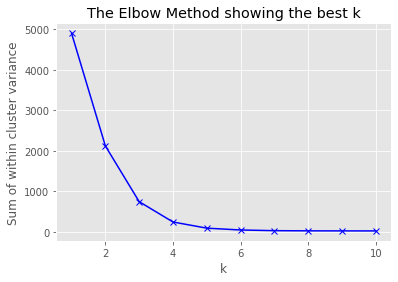

In [34]:
X = df1.drop(columns=['user_id', 'q16s'])
intra_var = []
K = range(1,11)
for k in K:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X)
  intra_var.append(kmeans.inertia_)

plt.plot(K, intra_var,'bx-')
plt.xlabel('k')
plt.ylabel('Sum of within cluster variance')
plt.title('The Elbow Method showing the best k')
plt.show()

# raise NotImplementedError()

The best k is 3 where the inflection point of the biggest change in slope.

### Question 10 `(1 points)`
**This question will be manually graded.**

For this question please come up with your own question about this dataset and using a clustering technique as part of your method of answering it. Describe in short the question, and how clustering can answer that question.


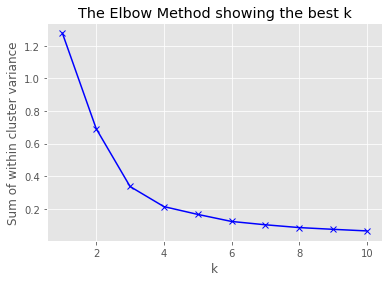

In [35]:
# my question: What is the best k using the Elbow Method rather than Silhouette Score as the metric in Question3? Will the k be different?
X_1 = df1.loc[:,'q11':'q13']
sse = []
K = range(1,11)
for k in K:
  kmeans_1 = KMeans(n_clusters=k, random_state=42)
  kmeans_1.fit(X_1)
  sse.append(kmeans_1.inertia_)

plt.plot(K, sse,'bx-')
plt.xlabel('k')
plt.ylabel('Sum of within cluster variance')
plt.title('The Elbow Method showing the best k')
plt.show()
# raise NotImplementedError()

The best k=3 if we change the metric to SSE with Elbow Method rather than k=8 if using Silhouette Score. Since we don't consider inter-cluster distances in the Elbow method, we get a different k in clustering. This tells us that metric to evaluate clustering performance is very important.

## Bonus question (`2 Points`) - Reviewer overlap:
- Download last week's dataset
- Aggregate cool, funny and useful votes for each business id
- You may transform the aggregations (take %, log, or leave it as it is)
- Cluster this dataframe (you can choose k). Do you find any meaningful/interesting clusters?
- Assign the cluster label to each business id
- Merge this with users to show what clusters the reviewers have reviewed. (You may need to use the pivot function) 

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()